### Evaluation Histogram Plot 

To visualize the performance we will plot histograms of classifier logit scores for positive and negative samples. We need to transform the scores back into the logit scale because now they are contained from 0,1 and we need them to be -inf +inf with the 0 in the middle. We will use the one-hot-labeled evaluation set and the continues scores. In the one hot eval set we will use 0 as negative and 1 as positive. Then we will plot the frequency of predictions accoridng to each score and paint the predictions according to the true label. 

The center (logit = 0) corresponds to 50% probability

Higher logits = more confident predictions for positives

Lower logits = more confident for negatives

In [17]:
import os
import pandas as pd
import numpy as np
from scipy.special import logit
from tqdm.autonotebook import tqdm

#set up plotting
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=[15,5] #for large visuals
%config InlineBackend.figure_format = 'retina'


In [10]:
# Paths to the CSV files
true_labels_path = ('/mnt/d/retraining_BirdNET_2025/model_test/input_ready/one-hot-encoded_validation-merged-songs.csv')
predictions_path = ('/mnt/d/retraining_BirdNET_2025/model_test/results/model_2_0311/m2_predicted_labels-merged-songs.csv')

In [11]:
# Load the DataFrames
true_df = pd.read_csv(true_labels_path)
pred_df = pd.read_csv(predictions_path)

#### If want to perform class specific histogram **run 1** for overall performance historgram **run 2**

### 1. To plot class specific histograms

In [25]:
# Extract class columns (skip first 3 columns: file, start_time, end_time)
class_columns = true_df.columns[3:]

# Choose class to plot
class_name = "Common Pauraque"  # Change this to any class name
if class_name not in class_columns:
    raise ValueError(f"Class '{class_name}' not found in the data.")

In [26]:
# Extract true labels and prediction scores
true_labels = true_df[class_name].values
pred_probs = pred_df[class_name].values

In [27]:
# Convert to logits
eps = 1e-6  # avoid logit(0) or logit(1)
pred_probs = np.clip(pred_probs, eps, 1 - eps)
logits = logit(pred_probs)

In [28]:
# Split by true/false labels
logits_pos = logits[true_labels == 1]
logits_neg = logits[true_labels == 0]

Plot saved to: /mnt/d/retraining_BirdNET_2025/model_test/results/model_2_0311/m2_common-pauraque_logit_histogram.png


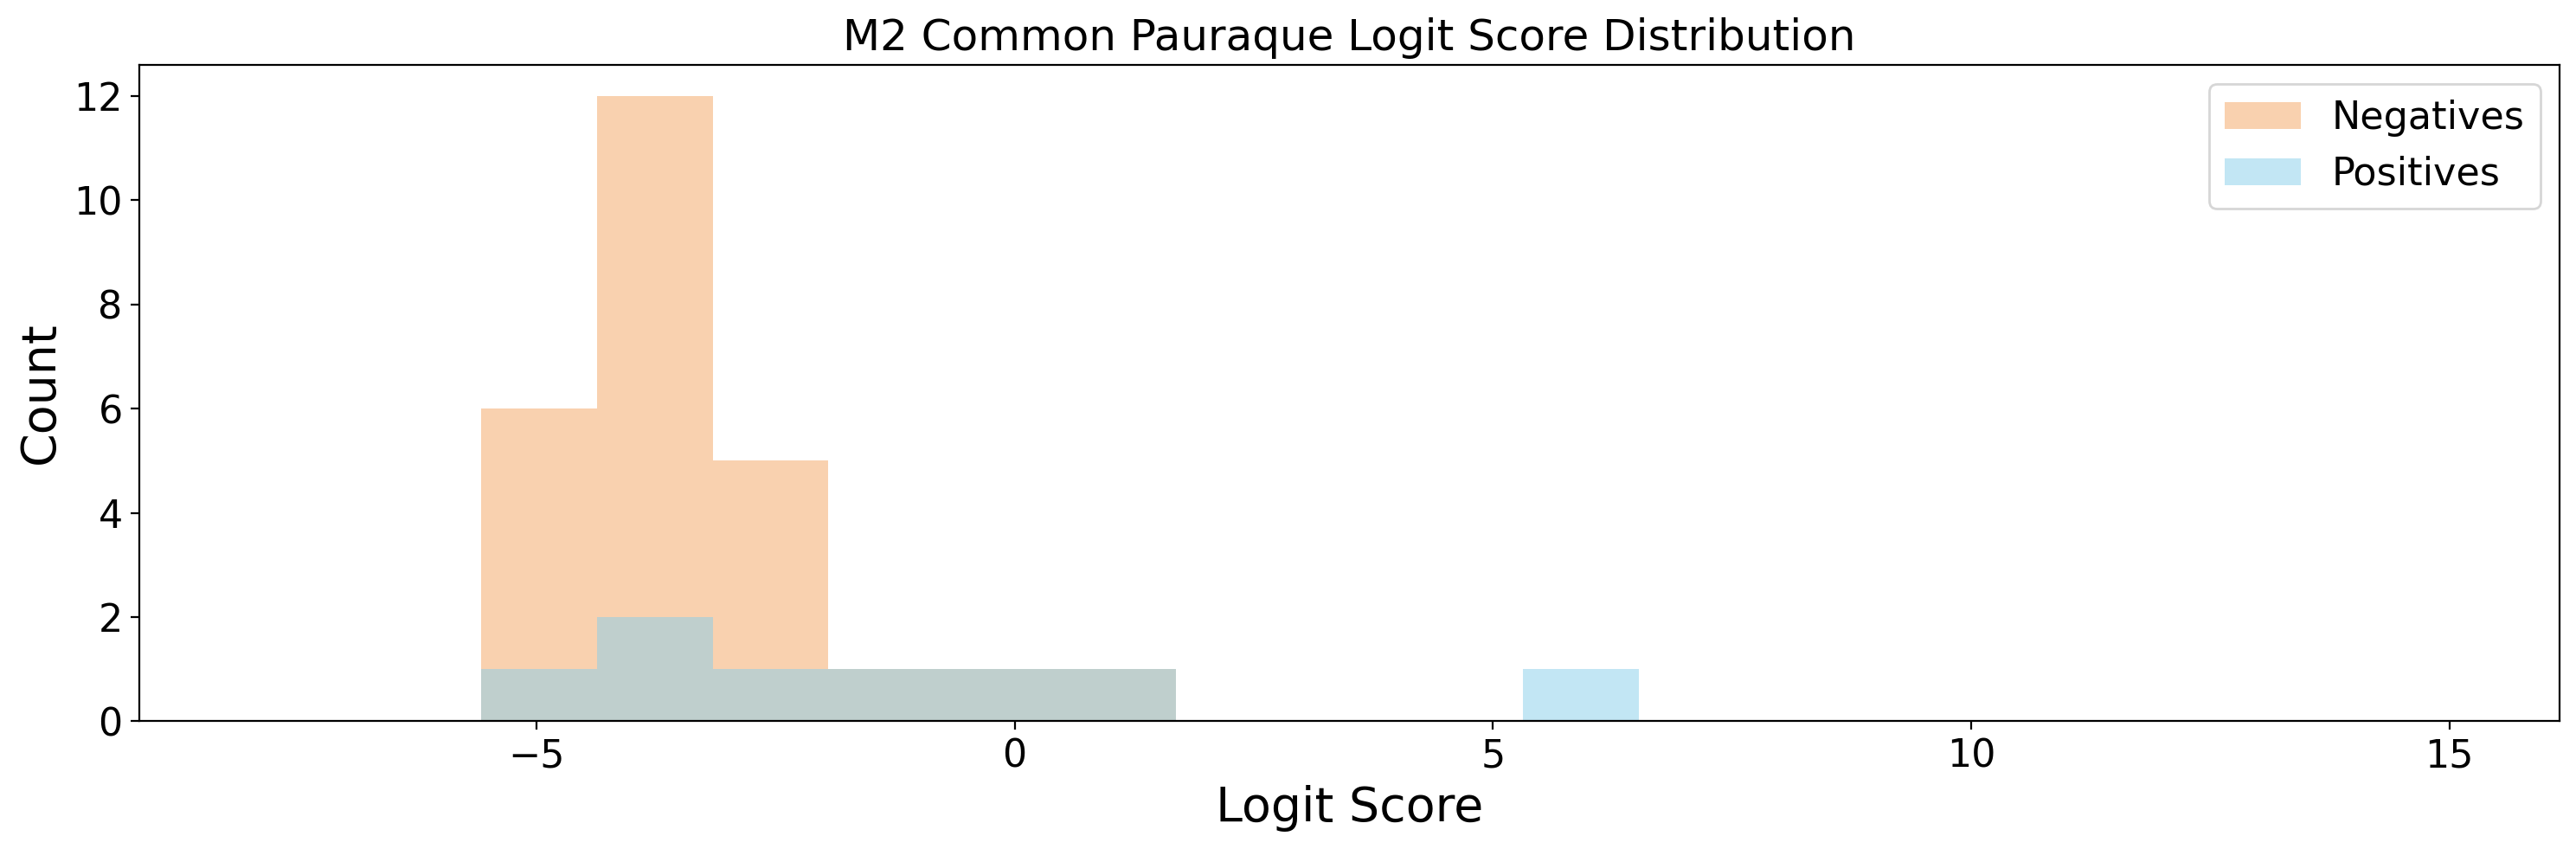

In [29]:
# Plot

# Set up bins
bins = np.linspace(-8, 15, 20)  # Adjust range & bin width as needed


plt.hist(logits_neg, bins=bins, alpha=0.5, label="Negatives", color='sandybrown')
plt.hist(logits_pos, bins=bins, alpha=0.5, label="Positives", color='skyblue')

# Get current axis object
ax = plt.gca()

# Set title and axis labels with font size
ax.set_title(f"M2 {class_name} Logit Score Distribution", fontsize=18)
ax.set_xlabel("Logit Score", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
# Set tick font sizes
ax.tick_params(axis='both', labelsize=16)  # for both x and y ticks

# Customize legend font size
plt.legend(loc='upper right', fontsize=16)

plt.tight_layout()

# Save BEFORE showing
output_dir = os.path.dirname(predictions_path)
plot_path = os.path.join(output_dir, "m2_common-pauraque_logit_histogram.png")
plt.savefig(plot_path, dpi=300)
print(f"Plot saved to: {plot_path}")

# Show the plot
plt.show()

### 2. To plot overal performance histogram

### a. To compute only for owl species or classes

In [12]:
# If want to compute histogram exclusively for owls
# Find columns that contain the word "Owl" (case-insensitive)
owl_columns = [col for col in true_df.columns[3:] if "owl" in col.lower()]

if not owl_columns:
    raise ValueError("No columns found containing 'owl' in their name.")

print(f"Using these columns for 'owl':\n{owl_columns}")

# Get values for only those owl-related classes
true_values = true_df[owl_columns].values.flatten()
pred_probs = pred_df[owl_columns].values.flatten()

Using these columns for 'owl':
['Barn Owl', 'Rusty-barred Owl', 'Ferruginous Pygmy-Owl', 'Tropical Screech-Owl', 'Black-capped Screech-Owl', 'Long-tufted Screech-Owl', 'Buff-fronted Owl', 'Stygian Owl', 'Striped Owl', 'Burrowing Owl', 'Black-banded Owl', 'Mottled Owl', 'Tawny-browed Owl']


### b. To compute for all classes

### From here on there is the same

In [13]:
# Clip predicted probabilities to avoid 0 and 1
eps = 1e-6
pred_probs = np.clip(pred_probs, eps, 1 - eps)

# Convert to logit scale
logits = logit(pred_probs)

In [14]:
# Split logits by true vs false
logits_pos = logits[true_values == 1]
logits_neg = logits[true_values == 0]

Plot saved to: /mnt/d/retraining_BirdNET_2025/model_test/results/model_2_0311/m2_overall_logit_histogram_owl_sp.png


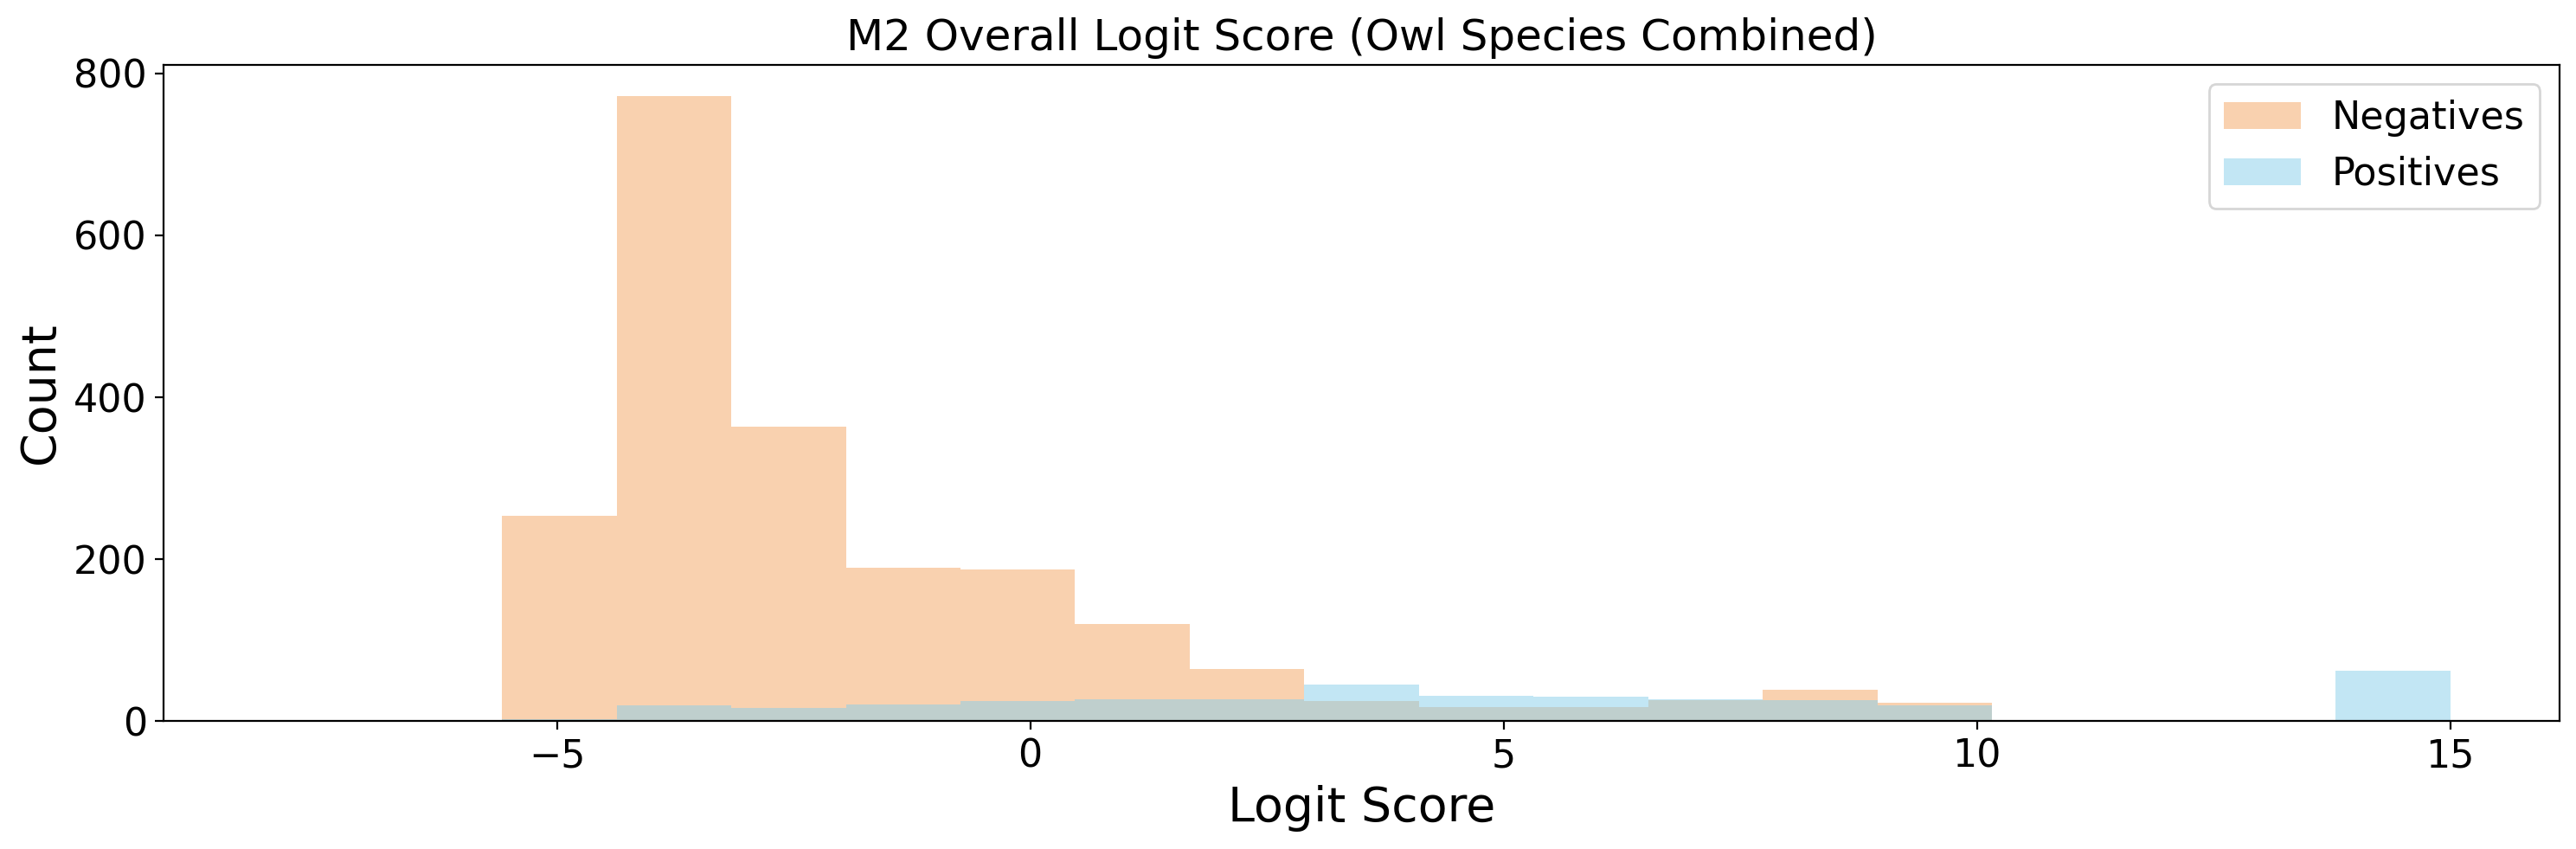

In [23]:
# Plot

# Set up bins
bins = np.linspace(-8, 15, 20)  # Adjust range & bin width as needed


plt.hist(logits_neg, bins=bins, alpha=0.5, label="Negatives", color='sandybrown')
plt.hist(logits_pos, bins=bins, alpha=0.5, label="Positives", color='skyblue')

# Get current axis object
ax = plt.gca()

# Set title and axis labels with font size
ax.set_title("M2 Overall Logit Score (Owl Species Combined)", fontsize=18)
ax.set_xlabel("Logit Score", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
# Set tick font sizes
ax.tick_params(axis='both', labelsize=16)  # for both x and y ticks

# Customize legend font size
plt.legend(loc='upper right', fontsize=16)

plt.tight_layout()

# Save BEFORE showing
output_dir = os.path.dirname(predictions_path)
plot_path = os.path.join(output_dir, "m2_overall_logit_histogram_owl_sp.png")
plt.savefig(plot_path, dpi=300)
print(f"Plot saved to: {plot_path}")

# Show the plot
plt.show()